# Wykład 13 - więcej o `numpy` i `matplotlib`

## Wczytywanie danych tabelarycznych

In [1]:
import numpy as np

Z Listy 12:

In [2]:
url = "https://raw.githubusercontent.com/GJ-Demo/PWAI/refs/heads/main/Wyk%C5%82ad12/wine.txt"
wine = np.loadtxt(url, delimiter=",", skiprows=1)

In [3]:
wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
np.set_printoptions(suppress=True) # wyświetlanie: bez notacji naukowej

In [5]:
wine

array([[   1.  ,   14.23,    1.71, ...,    1.04,    3.92, 1065.  ],
       [   1.  ,   13.2 ,    1.78, ...,    1.05,    3.4 , 1050.  ],
       [   1.  ,   13.16,    2.36, ...,    1.03,    3.17, 1185.  ],
       ...,
       [   3.  ,   13.27,    4.28, ...,    0.59,    1.56,  835.  ],
       [   3.  ,   13.17,    2.59, ...,    0.6 ,    1.62,  840.  ],
       [   3.  ,   14.13,    4.1 , ...,    0.61,    1.6 ,  560.  ]])

Przykład na potrzeby projektu: w pliku `k_d_01_2025.csv` (źródło: https://danepubliczne.imgw.pl/data/, IMGW) linijki zawierają dane różnego typu. Co więcej, plik nie jest kodowany w UTF-8 (powszechnym standardzie kodowania plików tekstowych, https://en.wikipedia.org/wiki/UTF-8).

In [6]:
# Linux
!wget "https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2025/2025_01_k.zip"
!unzip -f 2025_01_k.zip

--2026-01-16 12:50:36--  https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2025/2025_01_k.zip
Translacja danepubliczne.imgw.pl (danepubliczne.imgw.pl)... 91.220.17.226
Łączenie się z danepubliczne.imgw.pl (danepubliczne.imgw.pl)|91.220.17.226|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 15654 (15K) [application/zip]
Zapis do: `2025_01_k.zip.7'

2025_01_k.zip.7     100%[===================>]  15,29K  --.-KB/s     w 0s      

2026-01-16 12:50:36 (56,5 MB/s) - zapisano `2025_01_k.zip.7' [15654/15654]

Archive:  2025_01_k.zip


In [7]:
# Windows
!powershell Invoke-WebRequest -Uri "https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/2025/2025_01_k.zip" -OutFile "2025_01_k.zip"
!powershell Expand-Archive -Path "2025_01_k.zip" -Force -Destination .

/bin/bash: linia 1: powershell: nie znaleziono polecenia
/bin/bash: linia 1: powershell: nie znaleziono polecenia


"Modelowy" sposób czytania tego pliku: np. z użyciem biblioteki `pandas`. Można jednak użyć `numpy` i trochę popracować:

In [8]:
# "cp1250" zamiast domyślnego "utf8"
data = np.genfromtxt("k_d_01_2025.csv", delimiter=',', dtype=None, encoding="cp1250")

In [9]:
data

array([('"249180010"', '"PSZCZYNA                      "', '"2025"', '"01"', '"01"', 3.7, False, -4. , False, -0.2, False, -4.7, '', nan, '"9"', '', -1, '"9"'),
       ('"249180010"', '"PSZCZYNA                      "', '"2025"', '"01"', '"02"', 9.1, False, -1.5, False,  3.4, False, -8.4, '', 6.8, '', '"S"', -1, '"9"'),
       ('"249180010"', '"PSZCZYNA                      "', '"2025"', '"01"', '"03"', 1. , False, -3.5, False, -1.4, False, -3.9, '', 8.7, '', '"S"',  8, ''),
       ...,
       ('"254220090"', '"OLECKO                        "', '"2025"', '"01"', '"29"', 8.3, False,  5.8, False,  6.9, False,  4.9, '', nan, '"9"', '', -1, '"9"'),
       ('"254220090"', '"OLECKO                        "', '"2025"', '"01"', '"30"', 9.2, False,  4.7, False,  6. , False,  3. , '', nan, '"9"', '', -1, '"9"'),
       ('"254220090"', '"OLECKO                        "', '"2025"', '"01"', '"31"', 5.8, False,  0.5, False,  2.3, False, -1.4, '', 8.7, '', '"S"', -1, '"9"')],
      dtype=[('f0', '<U1

In [10]:
data.shape

(1333,)

Dostajemy zatem listę krotek - wystarczy do wyłuskania danych. Inny sposób (zrobiony do końca):

<font color="#C00000">**Dodane po wykładzie**</font>

<font color="#C00000">Zamiast sposobu z wykładu (podany dalej), można odczytać plik podając `"` jako ogranicznik elementów wiersza (działa w `numpy>=1.23.0`, czyli od ponad 3 lat):</font>

In [11]:
# dodane po wykładzie
data = np.loadtxt("k_d_01_2025.csv", delimiter=',', dtype=str, encoding="cp1250", quotechar='"')
data

array([['249180010', 'PSZCZYNA                      ', '2025', ..., '',
        '', '9'],
       ['249180010', 'PSZCZYNA                      ', '2025', ..., 'S',
        '', '9'],
       ['249180010', 'PSZCZYNA                      ', '2025', ..., 'S',
        '8', ''],
       ...,
       ['254220090', 'OLECKO                        ', '2025', ..., '',
        '', '9'],
       ['254220090', 'OLECKO                        ', '2025', ..., '',
        '', '9'],
       ['254220090', 'OLECKO                        ', '2025', ..., 'S',
        '', '9']], dtype='<U30')

Sposób z wykładu:

In [12]:
data = np.loadtxt("k_d_01_2025.csv", delimiter=',', dtype=str, encoding="cp1250")

In [13]:
data

array([['"249180010"', '"PSZCZYNA                      "', '"2025"', ...,
        '', '', '"9"'],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"', ...,
        '"S"', '', '"9"'],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"', ...,
        '"S"', '8', ''],
       ...,
       ['"254220090"', '"OLECKO                        "', '"2025"', ...,
        '', '', '"9"'],
       ['"254220090"', '"OLECKO                        "', '"2025"', ...,
        '', '', '"9"'],
       ['"254220090"', '"OLECKO                        "', '"2025"', ...,
        '"S"', '', '"9"']], dtype='<U32')

Kolumna zawierająca rok:

In [14]:
data.shape

(1333, 18)

In [15]:
data[:, 2]

array(['"2025"', '"2025"', '"2025"', ..., '"2025"', '"2025"', '"2025"'],
      dtype='<U32')

Takiej tablicy nie da się wprost skonwertować na `float`/`int` (napisy mają w środku symbol `"`). Można je jednak poobcinać:

In [16]:
data2 = np.char.strip(data[:, 2], '"') # w wersji dodanej po wykładzie: wystarczy data2=data
data2

array(['2025', '2025', '2025', ..., '2025', '2025', '2025'], dtype='<U32')

<font color="#C00000">W wersji dodanej po wykładzie wystarczy `data2 = data` (nie trzeba nic robić z kolumną, gdy tablica była odczytana z podaniem `quotechar='"'`).</font>

Teraz konwersja jest możliwa:

In [17]:
data2.astype(int)

array([2025, 2025, 2025, ..., 2025, 2025, 2025])

Podobnie dla średnich temperatur:

In [18]:
 np.char.strip(data[:, 9], '"').astype(float)

array([-0.2,  3.4, -1.4, ...,  6.9,  6. ,  2.3])

Przypomnienie na boku: tablice można łączyć.

In [19]:
A = np.zeros((10, 3))
B = np.ones((10, 6))

In [20]:
A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [21]:
B

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

Łączenie tablic "w poziomie" i "w pionie":

In [22]:
np.hstack((A, B))

array([[0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [23]:
np.vstack((A.T, B.T)) # A.T - transpozycja A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Komentarz: transpozycja tablicy $A$ o kształcie $(a_0, a_1, \ldots, a_n)$ to tablica $B$ o kształcie $(a_n, a_{n-1}, \ldots, a_0)$ taka, że $B[i_0, i_1, \ldots, i_n] = A[i_n, \ldots, i_1, i_0]$.

Transpozycja macierzy (tablicy wymiaru 2) odpowiada transpozycji znanej z algebry liniowej.

## Indeksowanie tablic `numpy`

Znane sposoby (indeksowanie i slicing):

In [24]:
wine[0, 0]

1.0

In [25]:
wine[2:5, 4:6]

array([[ 18.6, 101. ],
       [ 16.8, 113. ],
       [ 21. , 118. ]])

In [26]:
wine[2:5, 4]

array([18.6, 16.8, 21. ])

Indeksować można też ciągami:

In [27]:
wine[[0, 5, 10], :] # wiersze 0, 5, 10

array([[   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [   1.  ,   14.2 ,    1.76,    2.45,   15.2 ,  112.  ,    3.27,
           3.39,    0.34,    1.97,    6.75,    1.05,    2.85, 1450.  ],
       [   1.  ,   14.1 ,    2.16,    2.3 ,   18.  ,  105.  ,    2.95,
           3.32,    0.22,    2.38,    5.75,    1.25,    3.17, 1510.  ]])

In [28]:
wine[[0, 0, 0], :] # wiersze 0, 0, 0

array([[   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ]])

In [29]:
wine[range(0, 11, 5), :] # wiersze 0, 5, 10

array([[   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [   1.  ,   14.2 ,    1.76,    2.45,   15.2 ,  112.  ,    3.27,
           3.39,    0.34,    1.97,    6.75,    1.05,    2.85, 1450.  ],
       [   1.  ,   14.1 ,    2.16,    2.3 ,   18.  ,  105.  ,    2.95,
           3.32,    0.22,    2.38,    5.75,    1.25,    3.17, 1510.  ]])

Przypomnienie: `A * 2` (gdzie `A` jest tablicą) wykonuje działanie `x` $\mapsto$ `x * 2` na każdym elemencie z osobna:

In [30]:
A = np.arange(1, 10).reshape(3, 3)
print(A)
print(A * 2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


Podobnie dla innych operatorów, np. modulo:

In [31]:
A % 2

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

I nie tylko dla operatorów arytmetycznych:

In [32]:
A < 5

array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

In [33]:
A > 2

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Tablice jak wyżej (gdzie elementy to wartości logiczne) to *maski*.

Indeksowanie maską:

In [34]:
A[A > 2] # ciąg tych elementów, w których odpowiedni element maski był True

array([3, 4, 5, 6, 7, 8, 9])

Operacje logiczne na maskach:

In [35]:
(A < 5) & (A > 2) # koniunkcja

array([[False, False,  True],
       [ True, False, False],
       [False, False, False]])

In [36]:
(A < 5) | (A > 2) # alternatywa

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [37]:
~(A < 5) # negacja

array([[False, False, False],
       [False,  True,  True],
       [ True,  True,  True]])

Zwróćmy uwagę, że nie możemy użyć zwykłych logicznych operatorów (`and`, `or`, `not`).

Logika na maskach pozwala na konstrukcje w rodzaju:

In [38]:
A[(A < 5) & (A > 2)] # elementy A mniejsze niż 5 i większe niż 2

array([3, 4])

Gatunki win klasy 1:

In [39]:
wine[:, 0] 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

In [40]:
wine[:, 0] == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
wine[wine[:, 0] == 1, :]

array([[   1.  ,   14.23,    1.71,    2.43,   15.6 ,  127.  ,    2.8 ,
           3.06,    0.28,    2.29,    5.64,    1.04,    3.92, 1065.  ],
       [   1.  ,   13.2 ,    1.78,    2.14,   11.2 ,  100.  ,    2.65,
           2.76,    0.26,    1.28,    4.38,    1.05,    3.4 , 1050.  ],
       [   1.  ,   13.16,    2.36,    2.67,   18.6 ,  101.  ,    2.8 ,
           3.24,    0.3 ,    2.81,    5.68,    1.03,    3.17, 1185.  ],
       [   1.  ,   14.37,    1.95,    2.5 ,   16.8 ,  113.  ,    3.85,
           3.49,    0.24,    2.18,    7.8 ,    0.86,    3.45, 1480.  ],
       [   1.  ,   13.24,    2.59,    2.87,   21.  ,  118.  ,    2.8 ,
           2.69,    0.39,    1.82,    4.32,    1.04,    2.93,  735.  ],
       [   1.  ,   14.2 ,    1.76,    2.45,   15.2 ,  112.  ,    3.27,
           3.39,    0.34,    1.97,    6.75,    1.05,    2.85, 1450.  ],
       [   1.  ,   14.39,    1.87,    2.45,   14.6 ,   96.  ,    2.5 ,
           2.52,    0.3 ,    1.98,    5.25,    1.02,    3.58, 1290.  ],

In [42]:
data[data[:, 1] == '"PSZCZYNA                      "', :]

array([['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"01"', '3.7', '', '-4.0', '', '-0.2', '', '-4.7', '',
        '', '"9"', '', '', '"9"'],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"02"', '9.1', '', '-1.5', '', '3.4', '', '-8.4', '',
        '6.8', '', '"S"', '', '"9"'],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"03"', '1.0', '', '-3.5', '', '-1.4', '', '-3.9', '',
        '8.7', '', '"S"', '8', ''],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"04"', '-0.2', '', '-6.5', '', '-3.6', '', '-11.7', '',
        '', '"9"', '', '8', ''],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"05"', '3.1', '', '-10.8', '', '-3.8', '', '-15.2', '',
        '2.5', '', '"W"', '7', ''],
       ['"249180010"', '"PSZCZYNA                      "', '"2025"',
        '"01"', '"06"', '8.0', '', '-0.2', '', '3.

W których miejscach maska jest `True`?

In [43]:
A < 5

array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

In [44]:
np.where(A < 5)

(array([0, 0, 0, 1]), array([0, 1, 2, 0]))

## Podstawowe sposoby wizualizacji

In [45]:
import matplotlib.pyplot as plt

### Wykresy punktowe

Dotąd (por. lista 12):

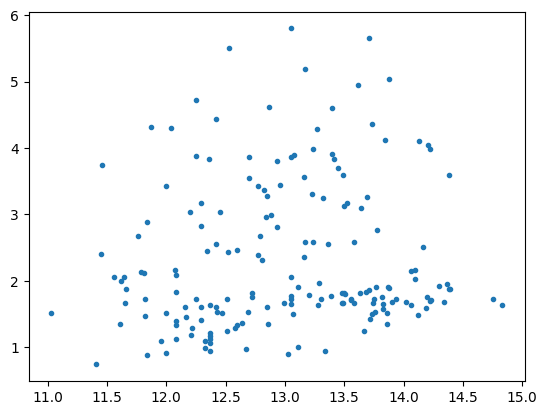

In [46]:
plt.plot(wine[:,1], wine[:,2], ls="None", markersize=3, marker='o')
plt.show()


Do wykresów punktowych lepiej służy `scatter`:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

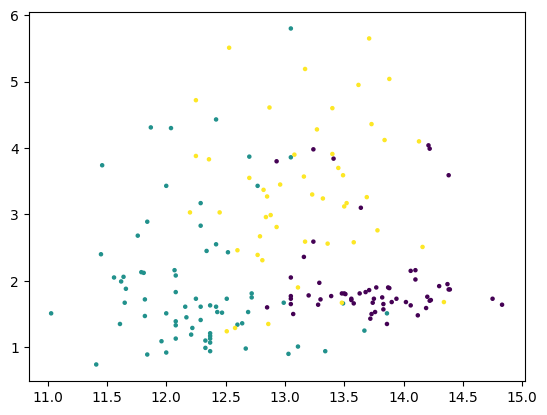

In [47]:
plt.scatter(wine[:,1], wine[:,2], s=5, c=wine[:, 0]) # c - sekwencja opisująca kolory
plt.show()

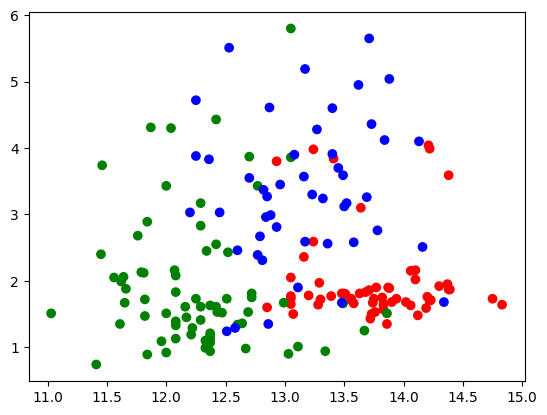

In [48]:
plt.scatter(wine[:,1], wine[:,2], c=np.array(["red", "green", "blue"])[wine[:, 0].astype(int) - 1])
plt.show()

Tutaj kończy się materiał z wykładu. Poniższy fragment będzie omówiony na początku wykładu 14.

### Histogramy

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

In [49]:
x = wine[:,1]
x

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

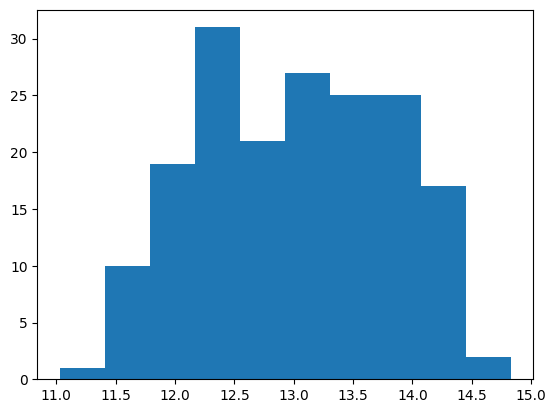

In [50]:
plt.hist(x)
plt.show()

Kontrola "kubełków" (bins):

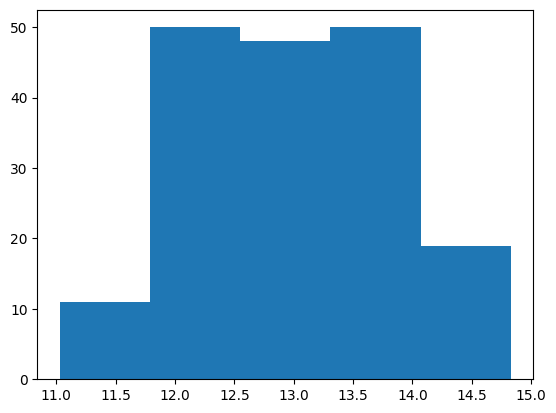

In [51]:
plt.hist(x, bins=5)
plt.show()

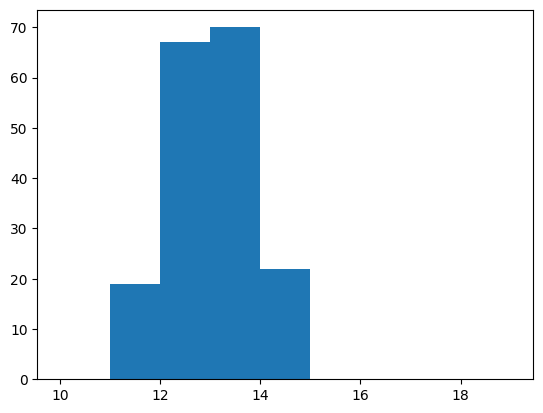

In [52]:
plt.hist(x, bins=range(10, 20))
plt.show()

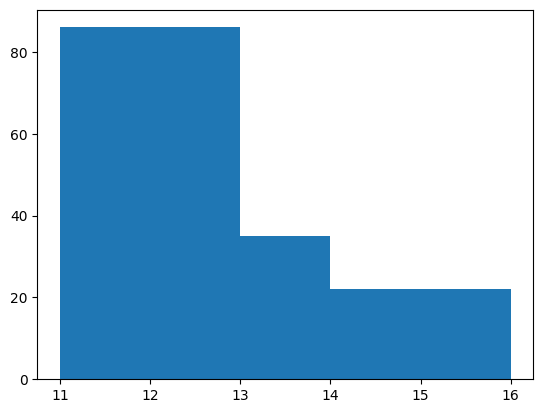

In [53]:
plt.hist(x, bins=[11, 13, 13.5, 14, 16])
plt.show()

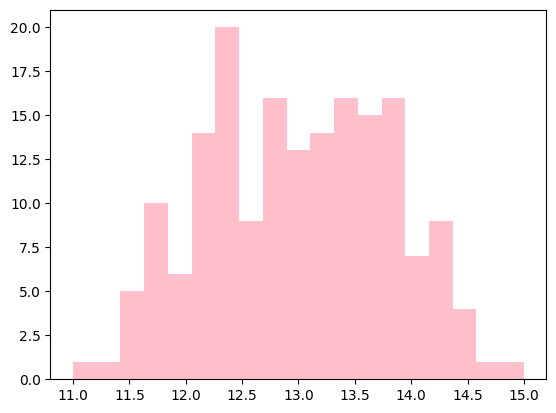

In [54]:
plt.hist(x, bins=np.linspace(11, 15, 20), color="pink")
plt.show()

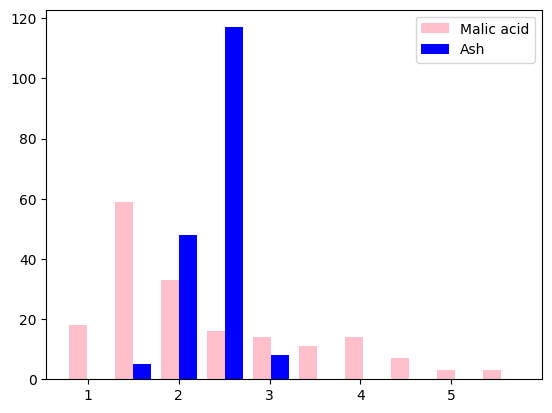

In [55]:
plt.hist(wine[:, [2, 3]], color=["pink", "blue"], label=["Malic acid", "Ash"])
plt.legend()
plt.show()

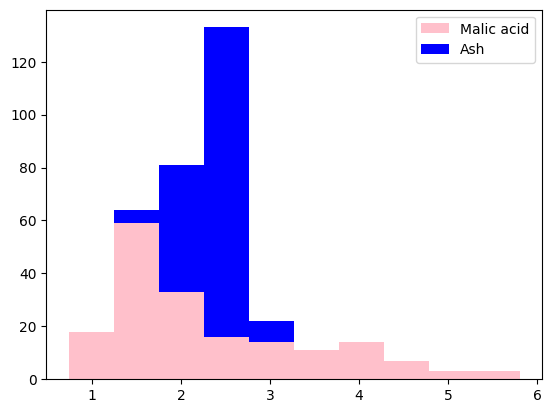

In [56]:
plt.hist(wine[:, [2, 3]], color=["pink", "blue"], label=["Malic acid", "Ash"], stacked=True)
plt.legend()
plt.show()

Patrz też: wykres słupkowy https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib-pyplot-bar

### Wykres kołowy

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

In [57]:
counts = [20, 15, 40, 5]
labels = ["koty", "psy", "szczury", "żółwie"]

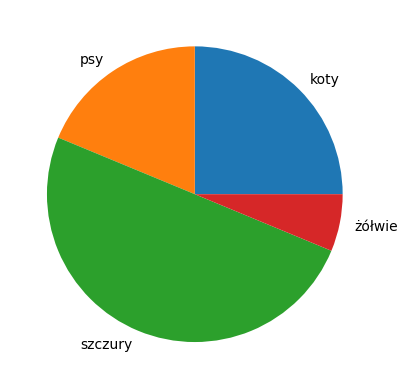

In [58]:
plt.pie(counts, labels=labels)
plt.show()

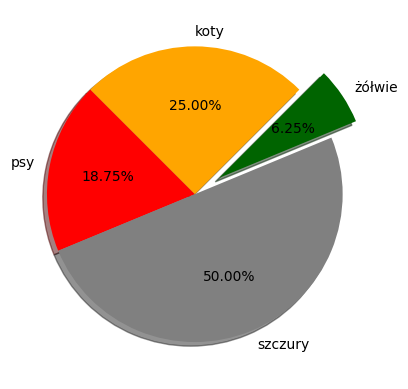

In [59]:
plt.pie(counts, labels=labels, colors=["orange", "red", "grey", "darkgreen"], autopct='%1.2f%%', startangle=45,
        explode=[0, 0, 0, 0.2], shadow=True)
plt.show()